<a href="https://colab.research.google.com/github/deviandinifebrianti/PCVK_Genap_2023/blob/main/Jobsheet%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 9

Nama Anggota Kelompok
1. ADINDA WAHYU LUCHMANSYAHVIRA (03 - 2141720096)
2. BAGUS REZKY ADHYAKSA (07 - 2141720210)
3. DEVI ANDINI FEBRIANTI (09 - 2141720189)



```
1. Gamma Correction
```



 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


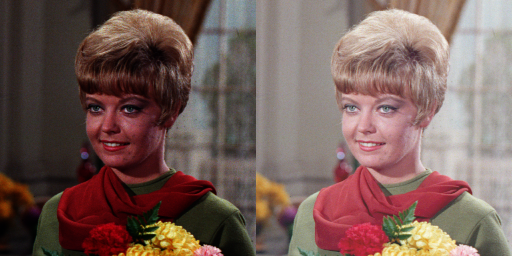

In [10]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

if original is None:
    print(f'File not found: {original}')
    exit()

# Normalisasi nilai piksel menjadi rentang [0, 1]
normalized_original = original / 255.0

# Aplikasikan gamma correction
gamma_img = np.zeros_like(original, dtype=np.uint8)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            gamma_img[y, x, c] = np.clip(255 * pow((normalized_original[y, x, c]), (1 / gamma)), 0, 255)


# Gabungkan gambar asli dan hasil gamma correction
final_frame = np.hstack((original, gamma_img))

# Tampilkan gambar
cv2_imshow(final_frame)



```
2. Image Depth
```



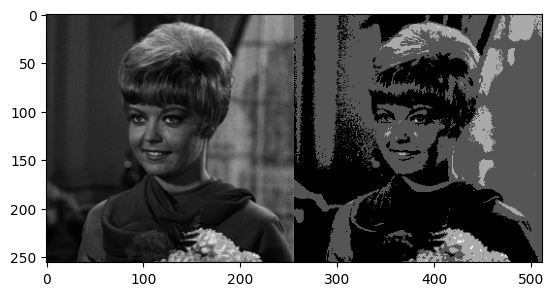

In [28]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, np.uint8)

for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i,j] = np.clip(round(original[i,j]/level), 0, 255) * level

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame, cmap='gray')
plt.show()



```
3. Average Denoising
```



In [62]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import glob

# Membaca citra asli
original_image = cv2.imread('/content/drive/MyDrive/PCVK/noise/galaxy.jpg')

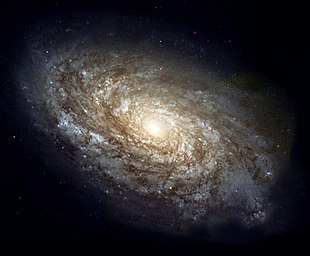

Jumlah Citra yang Di-Average: 5
Nilai PSNR: 361.20199909921956 dB
 


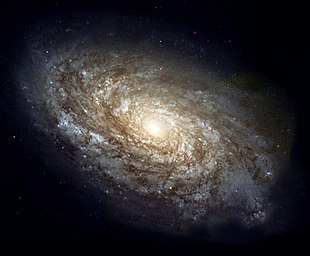

Jumlah Citra yang Di-Average: 10
Nilai PSNR: 361.20199909921956 dB
 


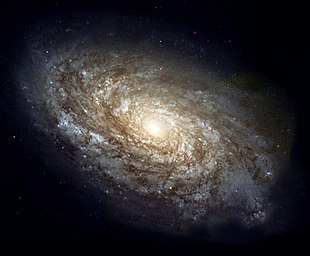

Jumlah Citra yang Di-Average: 20
Nilai PSNR: 361.20199909921956 dB
 


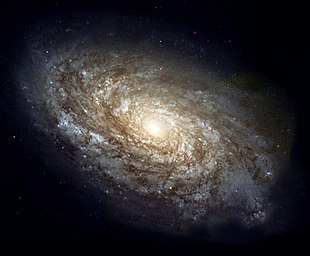

Jumlah Citra yang Di-Average: 40
Nilai PSNR: 361.20199909921956 dB
 


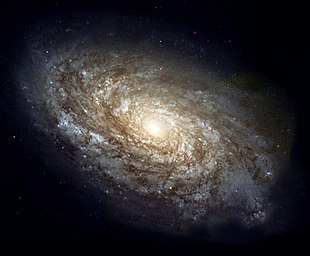

Jumlah Citra yang Di-Average: 80
Nilai PSNR: 361.20199909921956 dB
 


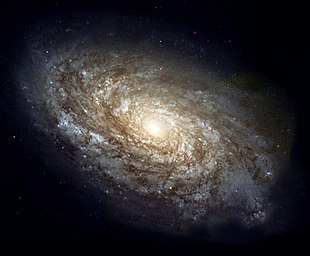

Jumlah Citra yang Di-Average: 100
Nilai PSNR: 361.20199909921956 dB
 


In [102]:
import glob

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Membaca semua citra dengan Gaussian Noise dari folder
noise_images = []
for img_path in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    noise = cv.imread(img_path)
    noise_images.append(noise)

# Inisialisasi citra gabungan dengan citra asli
combined_image = np.copy(original)

# List untuk menyimpan nilai PSNR tiap citra gabungan
psnr_values = []

# Jumlah citra yang akan di-average
jumlah_citra_di_average = [5, 10, 20, 40, 80, 100]

for jumlah_noise in jumlah_citra_di_average:
    # Mengambil n citra pertama dari list
    selected_images = noise_images[:jumlah_noise]

    # Proses penggabungan citra dengan Gaussian Noise ke citra asli dan menghitung PSNR
    for noise_image in selected_images:
        # Pastikan citra noise memiliki ukuran yang sama dengan citra asli
        noise_image = cv.resize(noise_image, (original.shape[1], original.shape[0]))

        # Lakukan penggabungan dengan operasi addWeighted
        combined_image = cv.addWeighted(combined_image, 0.7, noise_image, 0.3, 0)

    # Menghitung nilai PSNR antara citra asli dan citra gabungan
    psnr = cv.PSNR(original, combined_image)
    psnr_values.append(psnr)

    # Menampilkan citra gabungan
    cv2_imshow(combined_image)
    print(f'Jumlah Citra yang Di-Average: {jumlah_noise}')
    print(f'Nilai PSNR: {psnr} dB')
    print(' ')



```
4. Image Masking
```



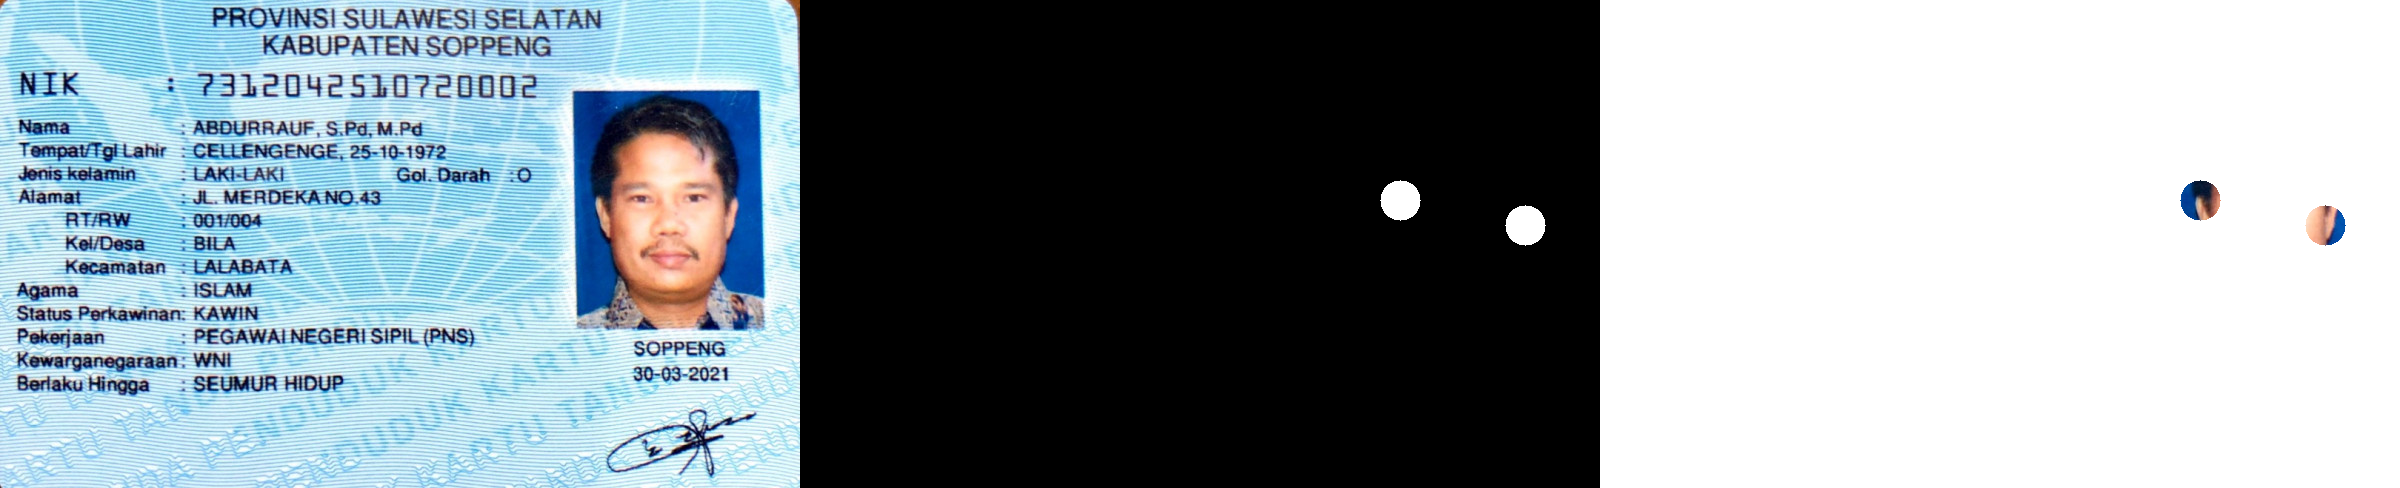

In [97]:
img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (600, 200), 20, (255,255,255), -1)
mask = cv.circle(mask, (725, 225), 20, (255,255,255), -1)

result = img & mask
# fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)



```
5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.
```



NOT (KOMPLEMEN)

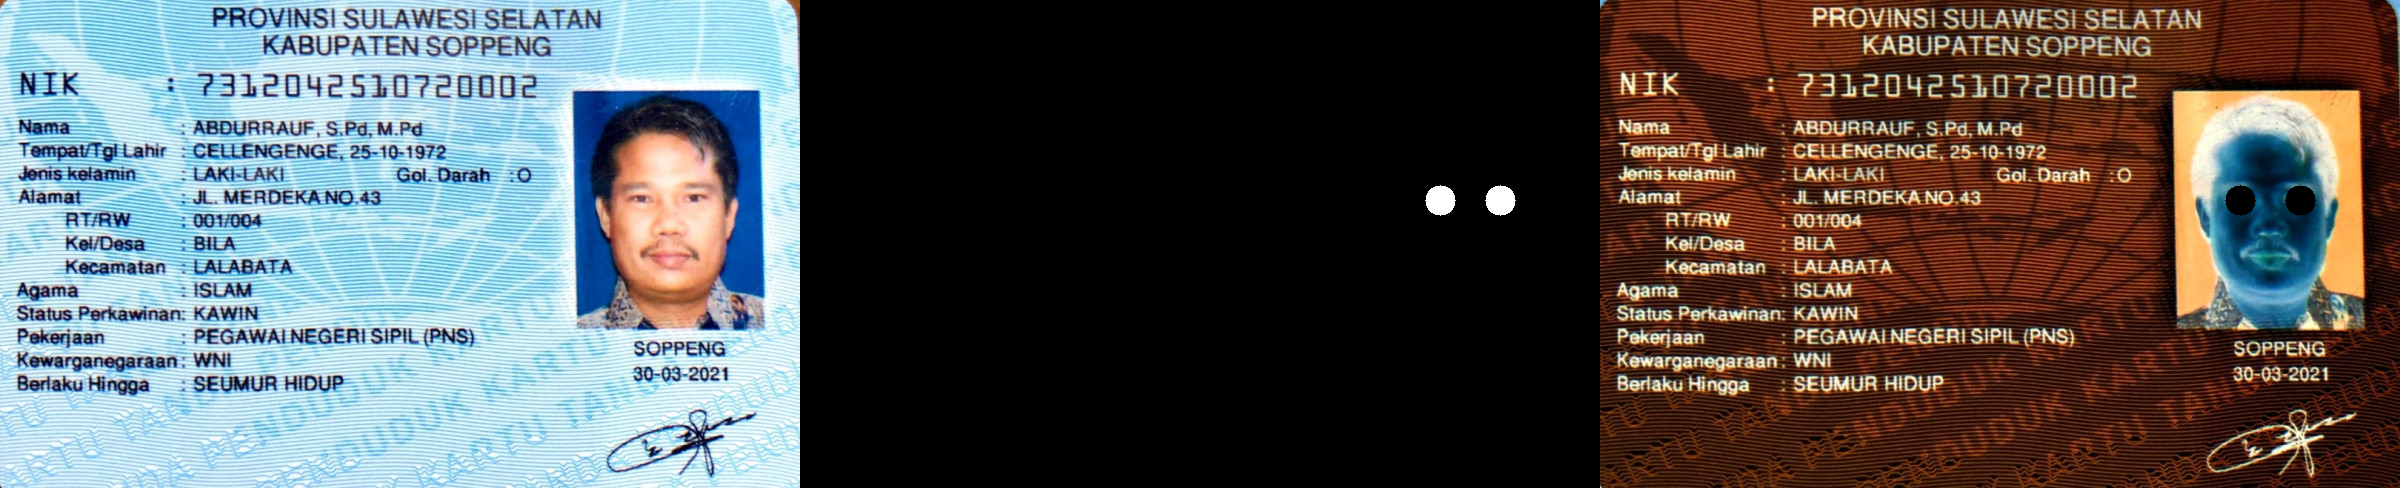

In [105]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 200), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 200), 15, (255, 255, 255), -1)

# Melakukan operasi NOT
masked = ~original & ~mask

# Menggabungkan hasil citra asli, mask dan hasil operasi NOT
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)

OR (ATAU)

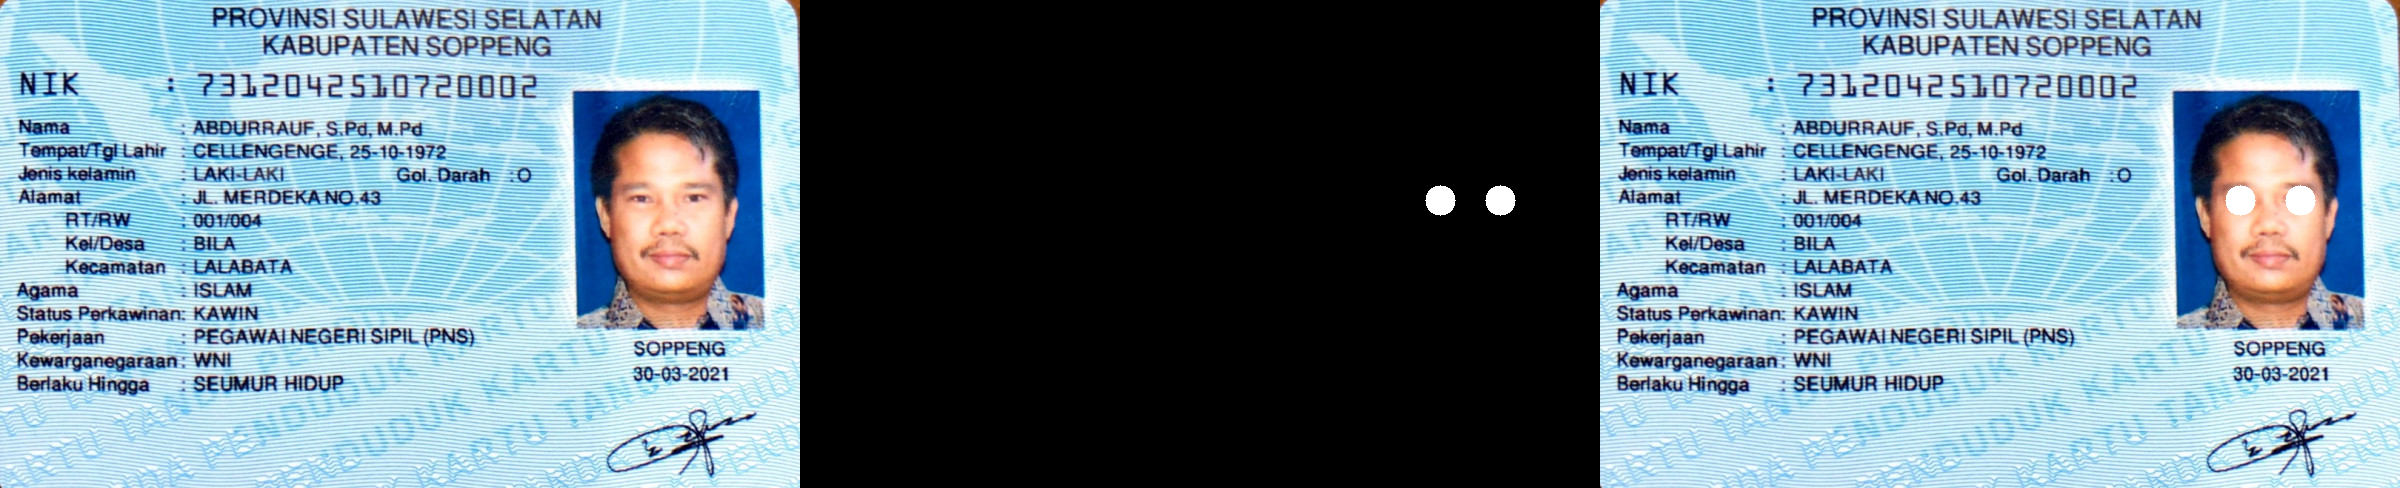

In [106]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 200), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 200), 15, (255, 255, 255), -1)

# Melakukan operasi OR
masked = original | mask

# Menggabungkan hasil citra asli, mask dan hasil operasi OR
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)

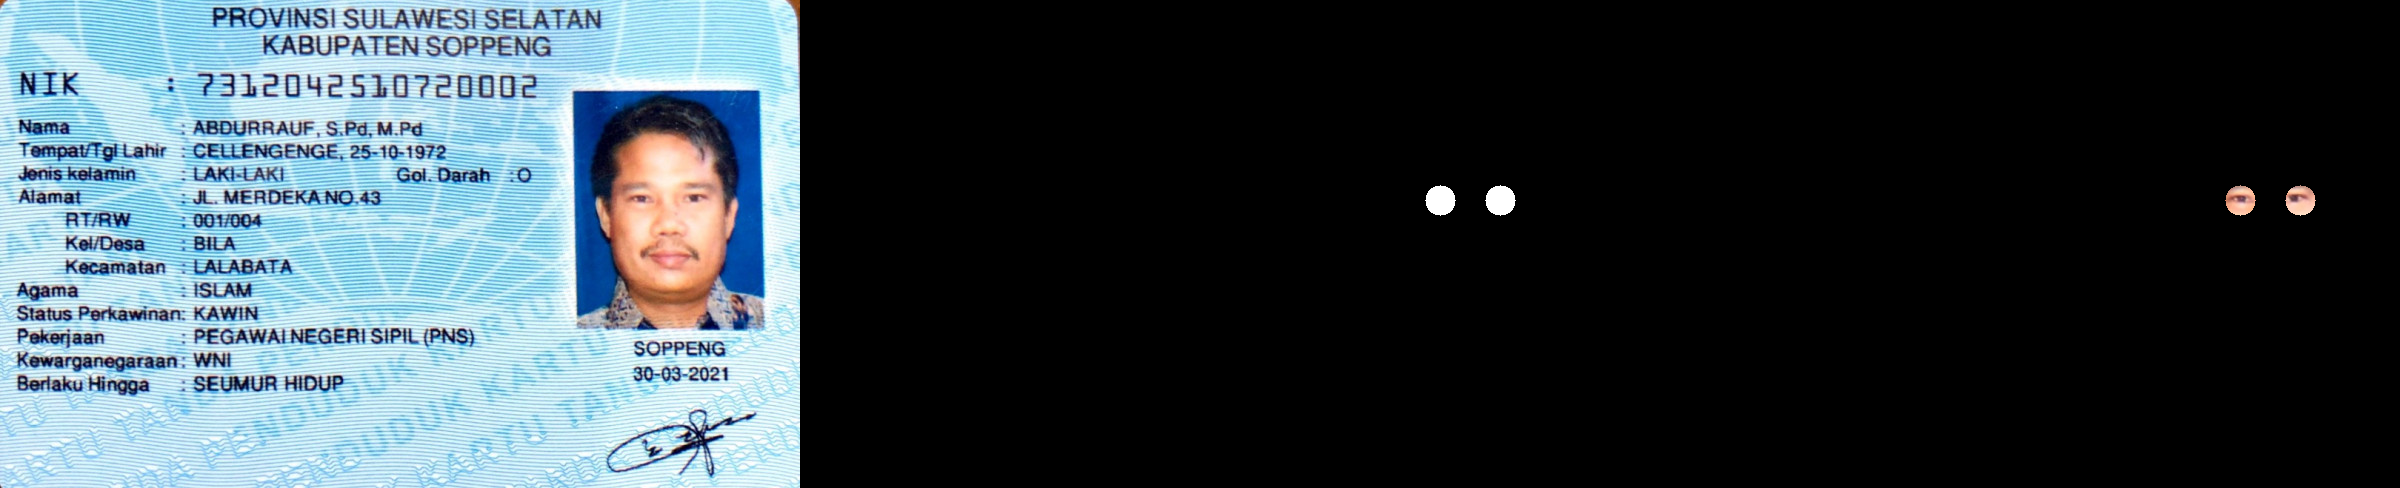

In [107]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 200), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 200), 15, (255, 255, 255), -1)

# Melakukan operasi AND bitwise antara gambar asli dan mask
masked = cv.bitwise_and(original, mask)

# Menggabungkan citra asli, mask, dan hasil AND bitwise
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)